Acerca del conjunto de datos
Contexto
En un documento publicado a principios de 2019, la previsión en los mercados energéticos se identifica como una de las áreas de mayor contribución de apalancamiento del aprendizaje automático/profundo hacia la transición a una infraestructura eléctrica basada en energías renovables.

Contenido
Este conjunto de datos contiene 4 años de datos de consumo eléctrico, generación, precios y clima para España. Los datos de consumo y generación se obtuvieron de la REGRT de Transporte, un portal público de datos de los operadores de servicios de transmisión (TSO). Los precios de liquidación se obtuvieron del TSO español Red Electric España. Los datos meteorológicos se compraron como parte de un proyecto personal de la API Open Weather para las 5 ciudades más grandes de España y se hicieron públicos aquí.

Agradecimientos
Estos datos están disponibles públicamente a través de ENTSOE y REE y se pueden encontrar en los enlaces anteriores.

Inspiración
El conjunto de datos es único porque contiene datos horarios de consumo eléctrico y las respectivas previsiones del GRT sobre el consumo y los precios. Esto permite comparar los pronósticos prospectivos con los pronósticos actuales del estado del arte que se utilizan en la industria.

Visualice las curvas de carga y oferta marginal.
¿Qué mediciones meteorológicas y ciudades influyen más en la demanda eléctrica, los precios, la capacidad de generación?
¿Podemos prever con 24 horas de antelación mejor que el TSO?
¿Podemos predecir el precio de la electricidad por hora del día mejor que el TSO?
Pronostique el precio intradía o la demanda eléctrica hora a hora.
¿Cuál es la fuente de próxima generación que se activará en la curva de carga?

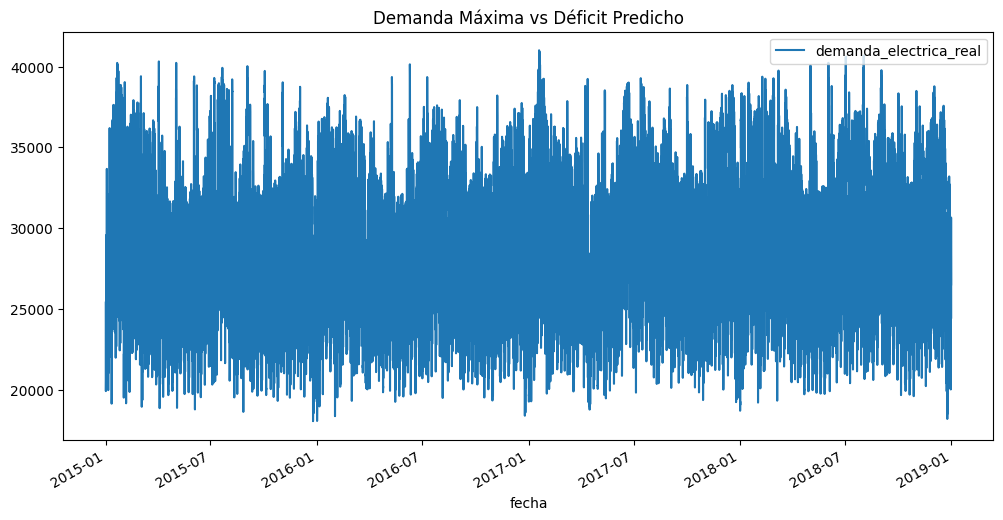

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = '../data/processed/energy_dataset.csv'
# Cargar datos (ejemplo)
df = pd.read_csv(file_path, parse_dates=['fecha'], index_col='fecha')

# Graficar demanda máxima y déficit predicho
df[['demanda_electrica_real']].plot(figsize=(12, 6))
plt.title('Demanda Máxima vs Déficit Predicho')
plt.show()

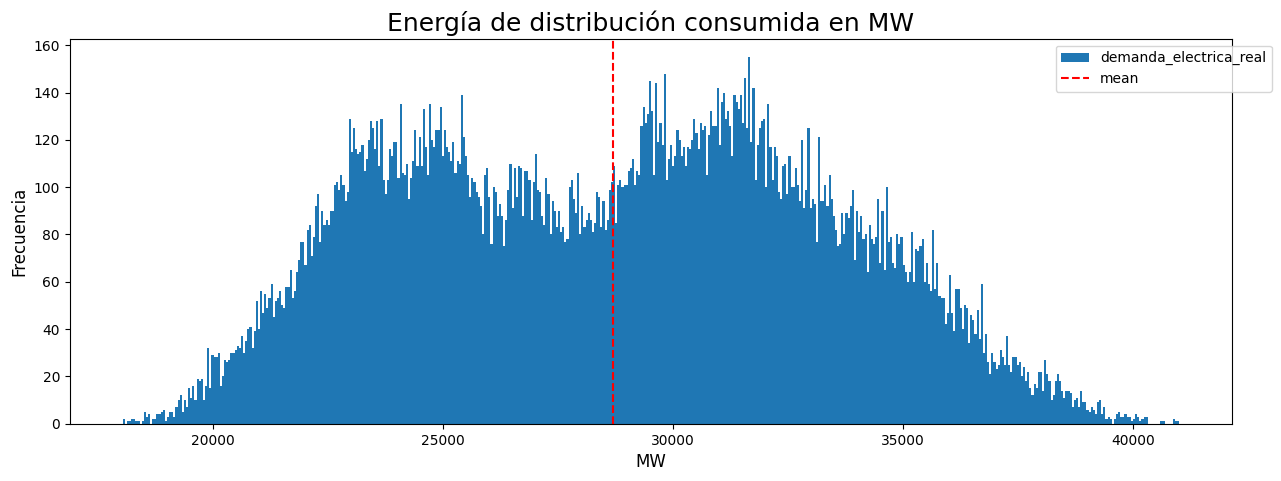

In [18]:
mean_MW = df['demanda_electrica_real'].mean()
mean_MW

df['demanda_electrica_real'].plot(figsize = (15,5), kind = 'hist', bins = 500)

plt.title('Energía de distribución consumida en MW', fontsize=18)

plt.xlabel('MW', fontsize=12)

plt.ylabel('Frecuencia', fontsize=12)

plt.axvline(x=mean_MW, color='r', linestyle = '--', label = 'mean')

plt.legend(bbox_to_anchor=(1.04,1))

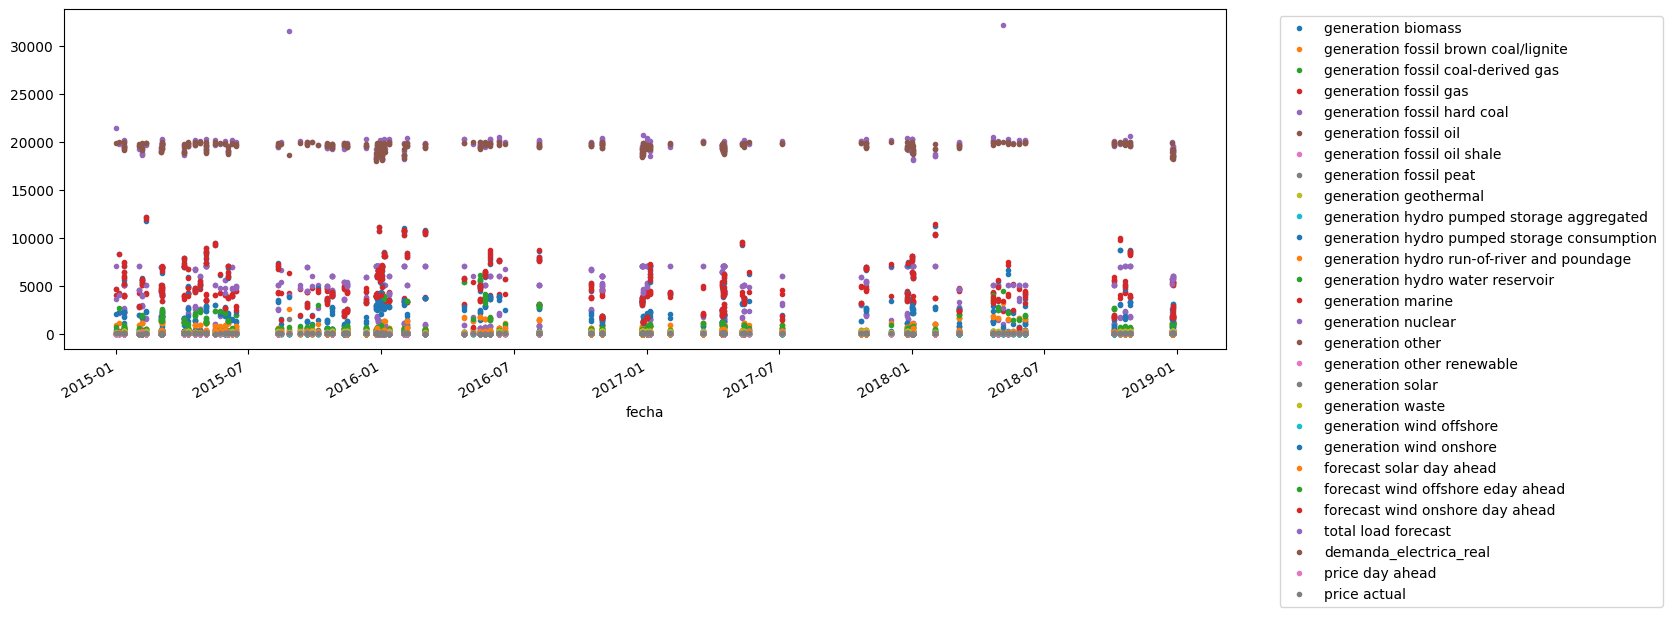

In [19]:
df.query('demanda_electrica_real < 20000').plot(figsize = (15,5), style = '.')
plt.legend(bbox_to_anchor=(1.04,1))

In [20]:
df.query('demanda_electrica_real < 20000')['demanda_electrica_real']

fecha
2015-01-01 05:00:00+01:00    19905.0
2015-01-05 07:00:00+01:00    19964.0
2015-01-11 02:00:00+01:00    19977.0
2015-01-11 03:00:00+01:00    19389.0
2015-01-11 04:00:00+01:00    19126.0
                              ...   
2018-12-25 08:00:00+01:00    19244.0
2018-12-26 02:00:00+01:00    19102.0
2018-12-26 03:00:00+01:00    18598.0
2018-12-26 04:00:00+01:00    18522.0
2018-12-26 05:00:00+01:00    19135.0
Name: demanda_electrica_real, Length: 306, dtype: float64

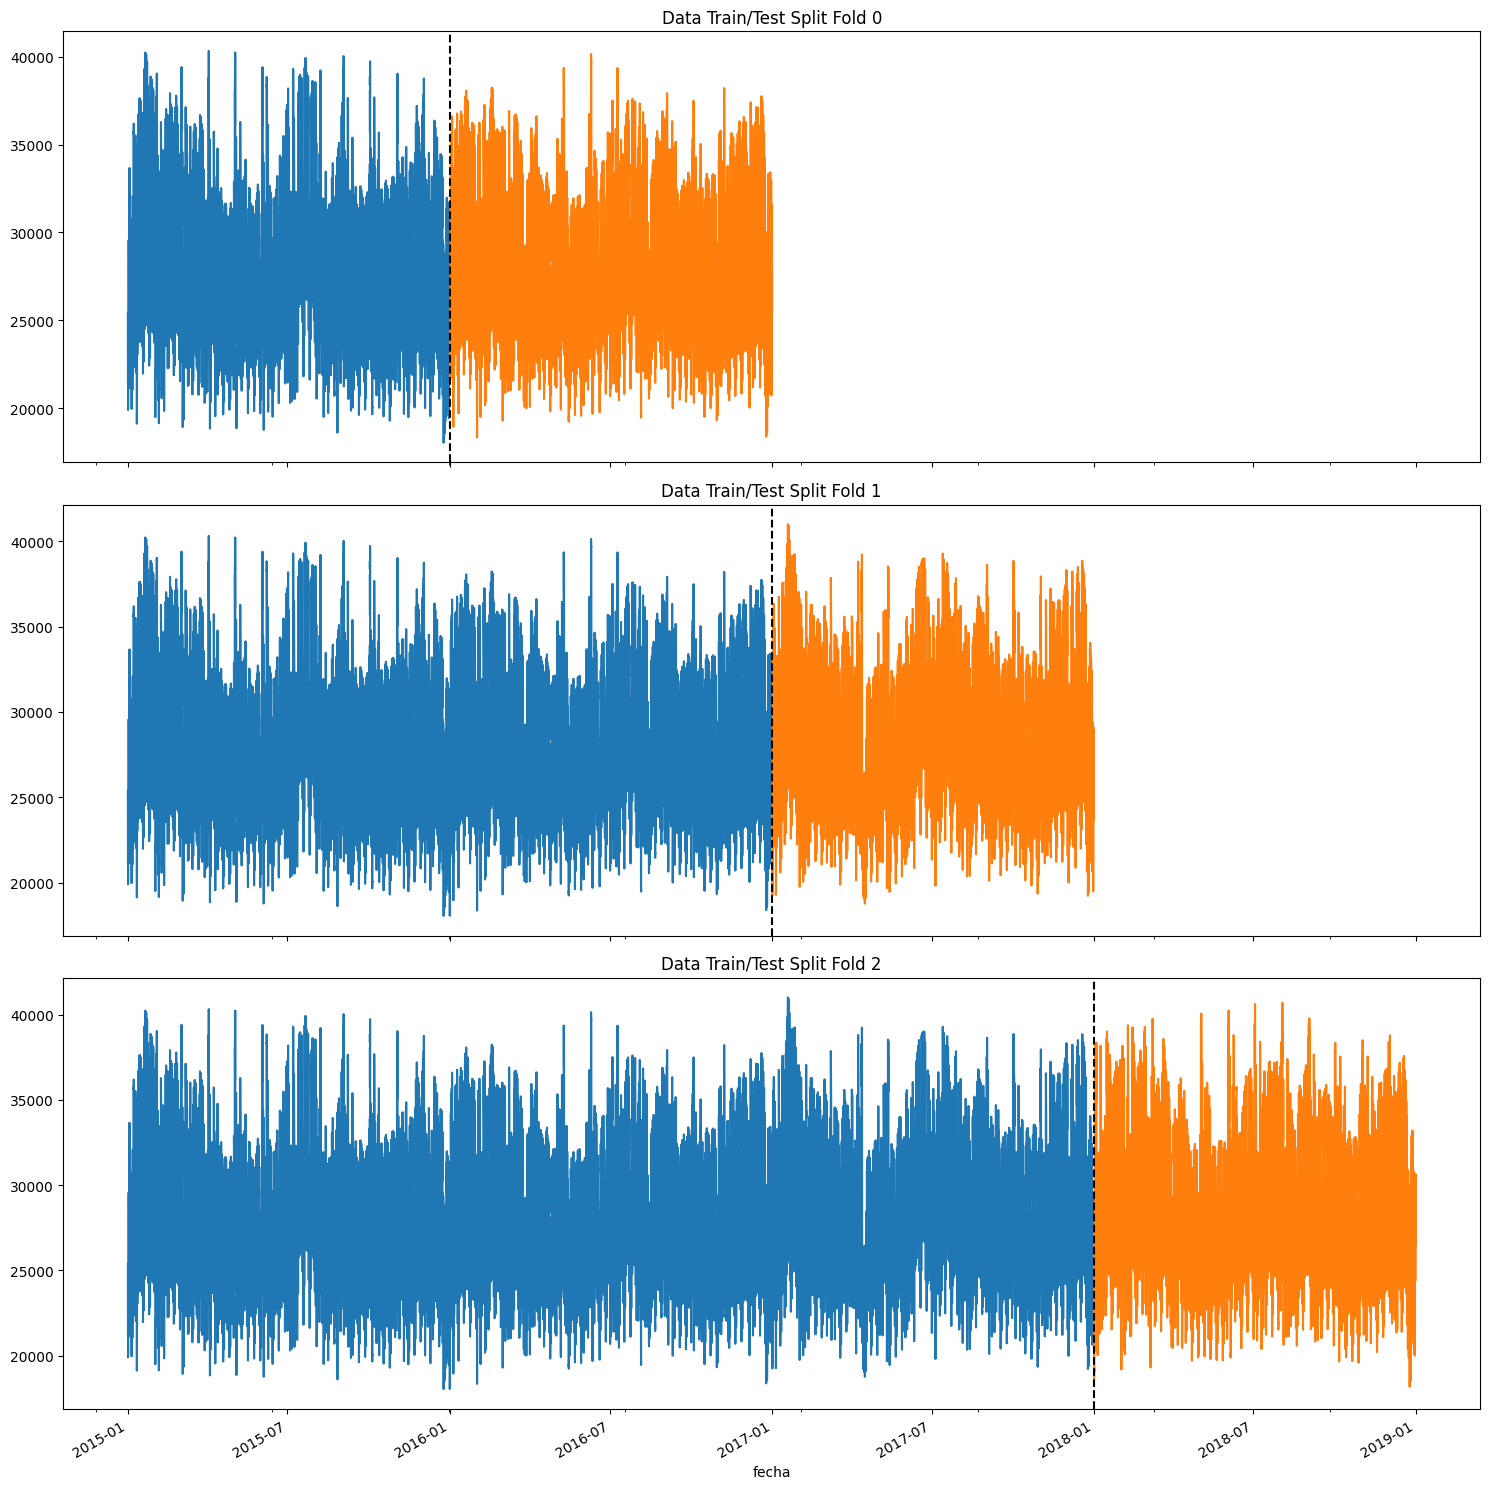

In [30]:
from sklearn.model_selection import TimeSeriesSplit

# Configura TimeSeriesSplit con 3 splits (igual que el número de subplots)
tss = TimeSeriesSplit(n_splits=3, test_size=8760, gap=24)

fig, axs = plt.subplots(3, 1, figsize=(15, 15), sharex=True)

fold = 0
for train_index, val_index in tss.split(df):
    train = df.iloc[train_index]
    test = df.iloc[val_index]
    
    train['demanda_electrica_real'].plot(
        ax=axs[fold],
        label='Training Set',
        title=f'Data Train/Test Split Fold {fold}'
    )
    test['demanda_electrica_real'].plot(  # Asegúrate de usar la misma columna que en train
        ax=axs[fold],
        label='Test Set'
    )
    
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold += 1

plt.tight_layout()
plt.show()

In [40]:
import pandas as pd

# Cargar datos
df = pd.read_csv('../data/processed/energy_dataset.csv')

# Eliminar todo desde el '+' incluyendo el símbolo
df['fecha'] = df['fecha'].str.split('+').str[0]

# Convertir a datetime (ahora sin la zona horaria)
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y-%m-%d %H:%M:%S')

# Extraer componentes temporales
df['anno'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
df['hora'] = df['fecha'].dt.hour

# Verificar
print(df[['fecha', 'anno', 'mes', 'dia', 'hora']].head())

                fecha  anno  mes  dia  hora
0 2015-01-01 00:00:00  2015    1    1     0
1 2015-01-01 01:00:00  2015    1    1     1
2 2015-01-01 02:00:00  2015    1    1     2
3 2015-01-01 03:00:00  2015    1    1     3
4 2015-01-01 04:00:00  2015    1    1     4


In [46]:
def create_features(df):
    """
    Create time series features based on time series index. 
    """
    df.copy()
    df['hora'] = df.index.hour
    df['dia'] = df.index.dayofweek

Text(0.5, 1.0, 'MW by Hour')

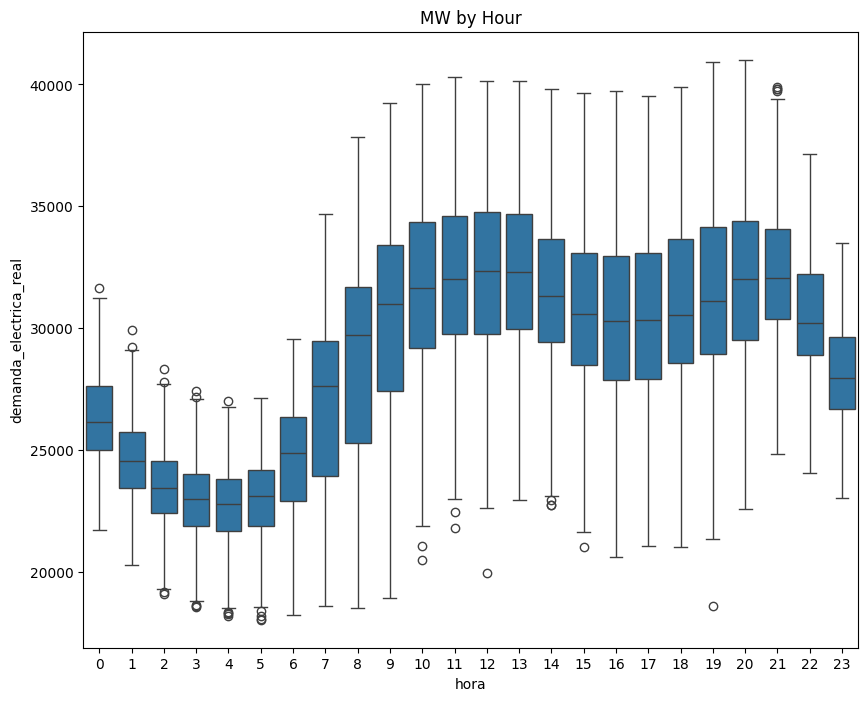

In [42]:
import seaborn as sns 
fig, ax= plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='hora', y='demanda_electrica_real')
ax.set_title('MW by Hour')

C:\Users\Amalia\AppData\Local\Temp\ipykernel_5876\3272674891.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='mes', y='demanda_electrica_real', palette='Blues')


Text(0.5, 1.0, 'MW by Month')

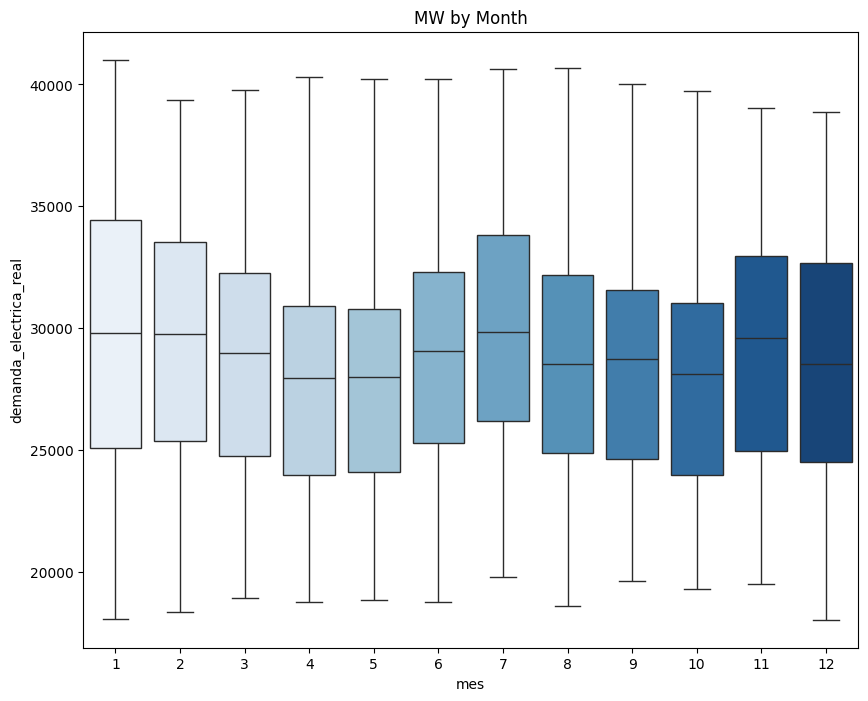

In [43]:
fig, ax= plt.subplots(figsize=(10, 8))
sns.boxplot(data=df, x='mes', y='demanda_electrica_real', palette='Blues')
ax.set_title('MW by Month')

In [ ]:
target_map = df['demanda_electrica_real'].to_dict()
def add_lags(df): 
    df['lag1'] = (df.index - pd.Timedelta('364 days')).map(target_map)
    df['lag2'] = (df.index - pd.Timedelta('728 days')).map(target_map)
    df['lag3'] = (df.index - pd.Timedelta('1092 days')).map(target_map)
    return df

Cargando datos...
Creando datos de ejemplo...
Datos cargados: 8760 registros
Rango de fechas: 2015-01-01 00:00:00 a 2015-12-31 23:00:00

Entrenando modelo...

=== MÉTRICAS DE ENTRENAMIENTO ===
MAE: 189.98
RMSE: 291.44
MAPE: 1.25
R2: 1.00

=== MÉTRICAS DE TEST ===
MAE: 428.04
RMSE: 611.35
MAPE: 2.96
R2: 0.99

=== TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ===
                           feature  importance
29  demanda_electrica_real_lag_168    0.899849
10             total load forecast    0.030028
24    demanda_electrica_real_lag_1    0.027810
32   demanda_electrica_real_diff_1    0.022103
27   demanda_electrica_real_lag_24    0.005458
33  demanda_electrica_real_diff_24    0.004082
18                        hora_cos    0.001247
25    demanda_electrica_real_lag_2    0.001200
30    demanda_electrica_real_ma_24    0.000956
26    demanda_electrica_real_lag_3    0.000756

Generando gráficos...


AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

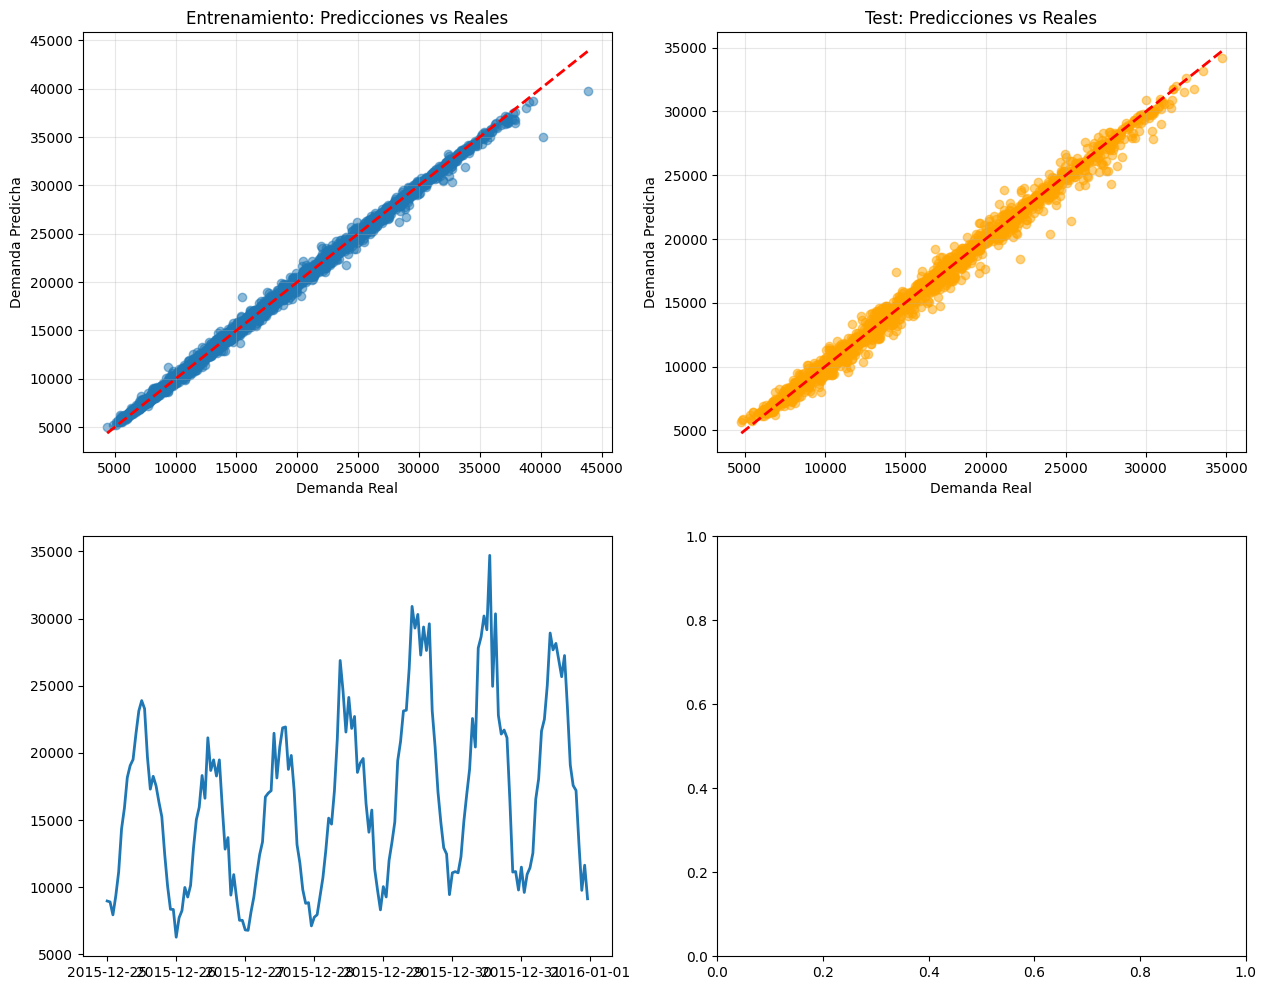

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Cargar y preparar los datos
def load_and_prepare_data(file_path):
    """
    Carga y prepara los datos de demanda eléctrica
    """
    # Cargar datos
    df = pd.read_csv(file_path)
    
    # Convertir fecha a datetime
    df['fecha'] = pd.to_datetime(df['fecha'])
    
    # Ordenar por fecha
    df = df.sort_values('fecha').reset_index(drop=True)
    
    # Eliminar columnas con muchos valores faltantes o vacías
    df = df.dropna(axis=1, how='all')
    
    # Rellenar valores faltantes con interpolación
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    df[numeric_cols] = df[numeric_cols].interpolate(method='linear')
    
    return df

def create_time_features(df):
    """
    Crea características temporales adicionales
    """
    df = df.copy()
    
    # Características temporales
    df['hora'] = df['fecha'].dt.hour
    df['dia_semana'] = df['fecha'].dt.dayofweek
    df['mes'] = df['fecha'].dt.month
    df['trimestre'] = df['fecha'].dt.quarter
    df['dia_año'] = df['fecha'].dt.dayofyear
    
    # Características cíclicas
    df['hora_sin'] = np.sin(2 * np.pi * df['hora'] / 24)
    df['hora_cos'] = np.cos(2 * np.pi * df['hora'] / 24)
    df['dia_sin'] = np.sin(2 * np.pi * df['dia_semana'] / 7)
    df['dia_cos'] = np.cos(2 * np.pi * df['dia_semana'] / 7)
    df['mes_sin'] = np.sin(2 * np.pi * df['mes'] / 12)
    df['mes_cos'] = np.cos(2 * np.pi * df['mes'] / 12)
    
    # Características de fin de semana
    df['es_fin_semana'] = (df['dia_semana'] >= 5).astype(int)
    
    return df

def create_lag_features(df, target_col, lags=[1, 2, 3, 24, 48, 168]):
    """
    Crea características de rezago (lag features)
    """
    df = df.copy()
    
    for lag in lags:
        df[f'{target_col}_lag_{lag}'] = df[target_col].shift(lag)
    
    # Medias móviles
    df[f'{target_col}_ma_24'] = df[target_col].rolling(window=24, min_periods=1).mean()
    df[f'{target_col}_ma_168'] = df[target_col].rolling(window=168, min_periods=1).mean()
    
    # Características de tendencia
    df[f'{target_col}_diff_1'] = df[target_col].diff(1)
    df[f'{target_col}_diff_24'] = df[target_col].diff(24)
    
    return df

def prepare_features(df):
    """
    Prepara todas las características para el modelo
    """
    # Crear características temporales
    df = create_time_features(df)
    
    # Crear características de rezago
    df = create_lag_features(df, 'demanda_electrica_real')
    
    # Agregar características de generación total
    generation_cols = [col for col in df.columns if col.startswith('generation') 
                      and 'consumption' not in col]
    df['generacion_total'] = df[generation_cols].sum(axis=1, skipna=True)
    
    # Ratio de energías renovables
    renewable_cols = ['generation solar', 'generation wind offshore', 
                     'generation wind onshore', 'generation hydro run-of-river and poundage',
                     'generation hydro water reservoir', 'generation geothermal']
    renewable_cols = [col for col in renewable_cols if col in df.columns]
    df['generacion_renovable'] = df[renewable_cols].sum(axis=1, skipna=True)
    df['ratio_renovable'] = df['generacion_renovable'] / (df['generacion_total'] + 1e-6)
    
    return df

class DemandPredictionModel:
    def __init__(self):
        self.model = RandomForestRegressor(
            n_estimators=100,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            random_state=42
        )
        self.scaler = StandardScaler()
        self.feature_names = None
        self.target_col = 'demanda_electrica_real'
        
    def prepare_data(self, df):
        """
        Prepara los datos para entrenamiento
        """
        # Preparar características
        df_prep = prepare_features(df)
        
        # Seleccionar características relevantes
        exclude_cols = ['fecha', self.target_col]
        feature_cols = [col for col in df_prep.columns if col not in exclude_cols]
        
        # Eliminar filas con valores faltantes
        df_clean = df_prep.dropna()
        
        X = df_clean[feature_cols]
        y = df_clean[self.target_col]
        
        self.feature_names = feature_cols
        
        return X, y, df_clean
    
    def train(self, df, test_size=0.2):
        """
        Entrena el modelo
        """
        X, y, df_clean = self.prepare_data(df)
        
        # Dividir datos temporalmente (importante para series temporales)
        split_idx = int(len(df_clean) * (1 - test_size))
        
        X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
        y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]
        
        # Escalar características
        X_train_scaled = self.scaler.fit_transform(X_train)
        X_test_scaled = self.scaler.transform(X_test)
        
        # Entrenar modelo
        self.model.fit(X_train_scaled, y_train)
        
        # Hacer predicciones
        y_pred_train = self.model.predict(X_train_scaled)
        y_pred_test = self.model.predict(X_test_scaled)
        
        # Calcular métricas
        train_metrics = self.calculate_metrics(y_train, y_pred_train)
        test_metrics = self.calculate_metrics(y_test, y_pred_test)
        
        return {
            'train_metrics': train_metrics,
            'test_metrics': test_metrics,
            'y_train': y_train,
            'y_test': y_test,
            'y_pred_train': y_pred_train,
            'y_pred_test': y_pred_test,
            'dates_train': df_clean['fecha'].iloc[:split_idx],
            'dates_test': df_clean['fecha'].iloc[split_idx:]
        }
    
    def calculate_metrics(self, y_true, y_pred):
        """
        Calcula métricas de evaluación
        """
        return {
            'mae': mean_absolute_error(y_true, y_pred),
            'rmse': np.sqrt(mean_squared_error(y_true, y_pred)),
            'mape': np.mean(np.abs((y_true - y_pred) / y_true)) * 100,
            'r2': r2_score(y_true, y_pred)
        }
    
    def predict(self, df):
        """
        Hace predicciones sobre nuevos datos
        """
        X, _, _ = self.prepare_data(df)
        X_scaled = self.scaler.transform(X)
        predictions = self.model.predict(X_scaled)
        return predictions
    
    def get_feature_importance(self):
        """
        Obtiene la importancia de las características
        """
        importance = pd.DataFrame({
            'feature': self.feature_names,
            'importance': self.model.feature_importances_
        }).sort_values('importance', ascending=False)
        
        return importance

def plot_results(results):
    """
    Visualiza los resultados del modelo
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Gráfico 1: Predicciones vs Reales (Entrenamiento)
    axes[0, 0].scatter(results['y_train'], results['y_pred_train'], alpha=0.5)
    axes[0, 0].plot([results['y_train'].min(), results['y_train'].max()], 
                    [results['y_train'].min(), results['y_train'].max()], 'r--', lw=2)
    axes[0, 0].set_xlabel('Demanda Real')
    axes[0, 0].set_ylabel('Demanda Predicha')
    axes[0, 0].set_title('Entrenamiento: Predicciones vs Reales')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Gráfico 2: Predicciones vs Reales (Test)
    axes[0, 1].scatter(results['y_test'], results['y_pred_test'], alpha=0.5, color='orange')
    axes[0, 1].plot([results['y_test'].min(), results['y_test'].max()], 
                    [results['y_test'].min(), results['y_test'].max()], 'r--', lw=2)
    axes[0, 1].set_xlabel('Demanda Real')
    axes[0, 1].set_ylabel('Demanda Predicha')
    axes[0, 1].set_title('Test: Predicciones vs Reales')
    axes[0, 1].grid(True, alpha=0.3)
    
    # Gráfico 3: Serie temporal (últimos datos)
    last_days = min(168, len(results['dates_test']))  # Últimos 7 días
    axes[1, 0].plot(results['dates_test'].iloc[-last_days:], 
                    results['y_test'].iloc[-last_days:], 
                    label='Real', linewidth=2)
    axes[1, 0].plot(results['dates_test'].iloc[-last_days:], 
                    results['y_pred_test'].iloc[-last_days:], 
                    label='Predicción', linewidth=2)
    axes[1, 0].set_xlabel('Fecha')
    axes[1, 0].set_ylabel('Demanda Eléctrica')
    axes[1, 0].set_title('Serie Temporal - Últimos Datos')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    plt.setp(axes[1, 0].xaxis.get_majorticklabels(), rotation=45)
    
    # Gráfico 4: Errores residuales
    residuals = results['y_test'] - results['y_pred_test']
    axes[1, 1].scatter(results['y_pred_test'], residuals, alpha=0.5, color='green')
    axes[1, 1].axhline(y=0, color='r', linestyle='--')
    axes[1, 1].set_xlabel('Predicciones')
    axes[1, 1].set_ylabel('Residuales')
    axes[1, 1].set_title('Análisis de Residuales')
    axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

def main():
    """
    Función principal para ejecutar el modelo
    """
    # Cargar datos
    print("Cargando datos...")
    df = load_and_prepare_data('../data/processed/energy_dataset.csv')  # Reemplaza con tu archivo
    
    # Para demostración, crear datos sintéticos basados en tu muestra
    print("Creando datos de ejemplo...")
    dates = pd.date_range('2015-01-01', periods=8760, freq='H')  # Un año de datos horarios
    
    # Simular datos basados en tu estructura
    np.random.seed(42)
    df = pd.DataFrame({
        'fecha': dates,
        'generation biomass': np.random.normal(450, 50, len(dates)),
        'generation fossil brown coal/lignite': np.random.normal(330, 30, len(dates)),
        'generation fossil gas': np.random.normal(5000, 500, len(dates)),
        'generation fossil hard coal': np.random.normal(4800, 400, len(dates)),
        'generation fossil oil': np.random.normal(160, 20, len(dates)),
        'generation nuclear': np.random.normal(7000, 200, len(dates)),
        'generation solar': np.random.normal(300, 200, len(dates)) * 
                          np.maximum(0, np.sin(2 * np.pi * dates.hour / 24)),
        'generation wind onshore': np.random.normal(4000, 1000, len(dates)),
        'generation hydro run-of-river and poundage': np.random.normal(1000, 200, len(dates)),
        'generation hydro water reservoir': np.random.normal(1800, 300, len(dates)),
        'total load forecast': np.random.normal(25000, 2000, len(dates)),
        'price day ahead': np.random.normal(50, 10, len(dates))
    })
    
    # Crear demanda real correlacionada con generación y patrones temporales
    hourly_pattern = 0.8 + 0.4 * np.sin(2 * np.pi * (dates.hour - 6) / 24)
    daily_pattern = 0.9 + 0.2 * np.sin(2 * np.pi * dates.dayofweek / 7)
    seasonal_pattern = 0.95 + 0.1 * np.sin(2 * np.pi * dates.dayofyear / 365)
    
    df['demanda_electrica_real'] = (
        df['total load forecast'] * hourly_pattern * daily_pattern * seasonal_pattern +
        np.random.normal(0, 500, len(dates))
    )
    
    print(f"Datos cargados: {len(df)} registros")
    print(f"Rango de fechas: {df['fecha'].min()} a {df['fecha'].max()}")
    
    # Crear y entrenar modelo
    model = DemandPredictionModel()
    print("\nEntrenando modelo...")
    results = model.train(df)
    
    # Mostrar métricas
    print("\n=== MÉTRICAS DE ENTRENAMIENTO ===")
    for metric, value in results['train_metrics'].items():
        print(f"{metric.upper()}: {value:.2f}")
    
    print("\n=== MÉTRICAS DE TEST ===")
    for metric, value in results['test_metrics'].items():
        print(f"{metric.upper()}: {value:.2f}")
    
    # Mostrar importancia de características
    print("\n=== TOP 10 CARACTERÍSTICAS MÁS IMPORTANTES ===")
    importance = model.get_feature_importance()
    print(importance.head(10))
    
    # Visualizar resultados
    print("\nGenerando gráficos...")
    plot_results(results)
    
    return model, results

if __name__ == "__main__":
    model, results = main()

In [47]:
import xgboost as xgb
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_features(df):
    """
    Create time series features based on time series index.
    """
    df = df.copy()
    # Asegurarse de que el índice es datetime
    if not isinstance(df.index, pd.DatetimeIndex):
        raise ValueError("El índice del DataFrame debe ser DatetimeIndex")
    
    # Crear características temporales
    df['hora'] = df.index.hour
    df['dia'] = df.index.dayofweek
    df['mes'] = df.index.month
    df['anno'] = df.index.year
    
    return df  # ¡Importante devolver el DataFrame modificado!

# Preparación de datos (asegúrate de hacer esto antes)
# 1. Cargar datos
df = pd.read_csv('../data/processed/energy_dataset.csv')

# 2. Convertir columna fecha a datetime y establecer como índice
df['fecha'] = pd.to_datetime(df['fecha'].str.split('+').str[0])
df = df.set_index('fecha')

# 3. Ordenar por índice temporal
df = df.sort_index()

# 4. Crear lags (ejemplo para 3 lags)
for i in [1, 2, 3]:
    df[f'lag{i}'] = df['demanda_electrica_real'].shift(i)

# Eliminar filas con NaN (generadas por los lags)
df = df.dropna()

# Configuración de TimeSeriesSplit
tss = TimeSeriesSplit(n_splits=3, test_size=5000, gap=24)

fold = 0
preds = []
scores = []

for train_index, val_index in tss.split(df):
    train = df.iloc[train_index]
    test = df.iloc[val_index]

    # Crear características
    train = create_features(train)
    test = create_features(test)

    # Definir features y target
    FEATURES = ['hora', 'dia', 'mes', 'anno', 'lag1', 'lag2', 'lag3']
    TARGET = 'demanda_electrica_real'
    
    X_train = train[FEATURES]
    y_train = train[TARGET]

    X_test = test[FEATURES]
    y_test = test[TARGET]
    
    # Configuración del modelo (corregido early_stopping_rounds)
    reg = xgb.XGBRegressor(
        base_score=0.5,
        booster='gbtree',
        n_estimators=1000,
        early_stopping_rounds=50,  # Corregido: con underscore
        objective='reg:squarederror',  # Actualizado a objetivo moderno
        max_depth=3,
        learning_rate=0.01
    )

    reg.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100
    )
    
    y_pred = reg.predict(X_test)
    preds.append(y_pred)
    
    # Calcular y almacenar métricas
    score = np.sqrt(mean_squared_error(y_test, y_pred))
    scores.append(score)
    
    print(f'Fold {fold} RMSE: {score}')
    fold += 1

# Calcular métrica promedio
print(f'\nRMSE promedio: {np.mean(scores)}')

ValueError: Cannot have number of folds=4 greater than the number of samples=0.